# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# Enter your code here

#A)
pd.set_option('display.max_columns', None)
df = pd.read_csv('mushrooms.csv')
df.head()

#B)
#C)
#df2 = pd.get_dummies(df, columns=["cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"])
xnondummy = df.iloc[:,1:]
 
#D)
X = pd.get_dummies(xnondummy, columns = xnondummy.columns) 
y = df.iloc[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2020,stratify=y)

#E)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state = 2020)
dt.fit(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(2437, 117)
(2437,)
(5687, 117)
(5687,)


2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[2946    0]
 [   4 2737]]


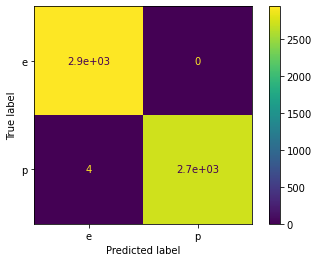

In [ ]:
# Enter your code here
y_pred = dt.predict(X_test)
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,X_test,y_test)
plt.show()


ytrain_pred = dt.predict(X_train)

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
# Enter your code here
print('Accuracy =', metrics.accuracy_score(y_train, ytrain_pred))

Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.9992966414629858


5. Show the classification tree and save it (5 marks)


['e' 'p']


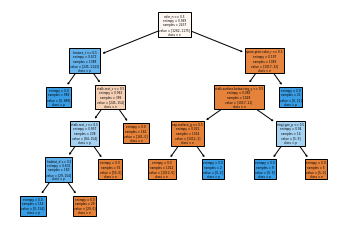

In [ ]:
# Enter your code here
from sklearn import tree

print(dt.classes_)

plt.figure(2)
fn = X.columns
cn = dt.classes_.tolist()
mushroomTree = tree.plot_tree(dt,feature_names=fn, class_names=cn, filled=True)
plt.show()



6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
# Enter your code here
print('Feature Importance:', dt.feature_importances_)
imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp.sort_values(by=[1]))

# top three features are odor_n, bruises_t, stalk-root_c

Feature Importance: [0.         0.         0.         0.         0.         0.
 0.         0.00856521 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.22564023 0.         0.
 0.         0.         0.         0.53184514 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0661131
 0.         0.04416057 0.         0.         0.         0.
 0.         0.         0.         0.0220861  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0054067  0.
 0.         0.         0.    

7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Enter your code here
mushroomdict = {"cap-shape":["x"],"cap-surface":["s"],"cap-color":["n"],"bruises":["t"],"odor":["y"],"gill-attachment":["f"],"gill-spacing":["c"],"gill-size":["n"],"gill-color":["k"],"stalk-shape":["e"],"stalk-root":["e"],"stalk-surface-above-ring":["s"],"stalk-surface-below-ring":["s"],"sstalk-color-above-ring":["w"],"stalk-color-below-ring":["w"],"veil-type":["p"],"veil-color":["w"],"ring-number":["o"],"ring-type":["p"],"spore-print-color":["r"], "population":["s"],"habitat":["u"]}
dt3 = pd.DataFrame(mushroomdict)
newframe = pd.concat([df,dt3], ignore_index = True)
pd.get_dummies(newframe)

#dt3.iloc[:,-1:]
#get last row data
#convert dictionary to dataframe

,habitat
0,u
